<a href="https://colab.research.google.com/github/sfmoram/PDI-SM/blob/main/Lab_7_PDI_Transformada_de_Fourier_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkred'> **Laboratorio: Procesamiento en el dominio de la frecuencia**

# <font color='darkred'> **Cargar las líbrerias**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
from   scipy.fftpack     import fft2,ifft2,fftshift,ifftshift
from   scipy.ndimage     import gaussian_filter
from   scipy.signal      import fftconvolve

# <font color='darkred'> **Carga de imagenes de prueba**

In [ ]:
!wget https://www.dropbox.com/s/xfbpk0ml1h69csl/paisaje.png
!wget https://www.dropbox.com/s/gprsmsn16dabmll/translape.tiff

--2023-09-12 22:02:48--  https://www.dropbox.com/s/xfbpk0ml1h69csl/paisaje.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xfbpk0ml1h69csl/paisaje.png [following]
--2023-09-12 22:02:48--  https://www.dropbox.com/s/raw/xfbpk0ml1h69csl/paisaje.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc45efdf0377da57a928f11a0104.dl.dropboxusercontent.com/cd/0/inline/CDnCChVyC25731vDAvQc_M9BLQ9BoiDkV_6MNN_Dxf34OTVRfH4PnWlK6vQAPs2gZb9da-VChJfst2NpPqeSf-Aazx7PvQ6_7evrpcKz5dlBuw0BzIgLjXW7ByluRAzIcOr3mTlJbZ3vqD5yHUsAJOgg/file# [following]
--2023-09-12 22:02:49--  https://uc45efdf0377da57a928f11a0104.dl.dropboxusercontent.com/cd/0/inline/CDnCChVyC25731vDAvQc_M9BLQ9BoiDkV_6MNN_Dxf34OTVRfH4PnWlK6vQAPs2gZb9da-VChJfst2NpPqeSf-Aazx7PvQ6_7evrpcKz5

# <font color='darkred'> **Lectura de imagen**

In [ ]:
X = cv2.imread("paisaje.png", 0)

# <font color='darkred'> **Funciones de visualización**
 <font color='darkblue'> Función surface_plot: Esta función genera una representación tridimensional de una matriz, donde los valores en la matriz se tratan como alturas en un gráfico de superficie.


<font color='darkgreen'> Función plot_spectrum: Esta función visualiza el espectro de frecuencia de una matriz (o imagen) después de aplicar una transformada de Fourier. La visualización utiliza una escala logarítmica para mejorar la visibilidad de los detalles.

In [ ]:
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

def plot_spectrum(X_ft,centered=True):
    # A logarithmic colormap
    if centered:
      X_ftc = fftshift(X_ft)
    else:
      X_ftc = X_ft
    plt.imshow(np.abs(X_ftc), norm=LogNorm(vmin=5))
    plt.colorbar()

# <font color='darkred'> **Transformada directa, fftshift, transformada inversa**

 Muestra visualmente la imagen original, su transformación al dominio de la frecuencia, el centrado y descentrado de ese espectro y, finalmente, la transformación inversa para obtener una imagen procesada.

 Es una excelente manera de entender y visualizar el proceso de transformación de Fourier y sus efectos en una imagen.

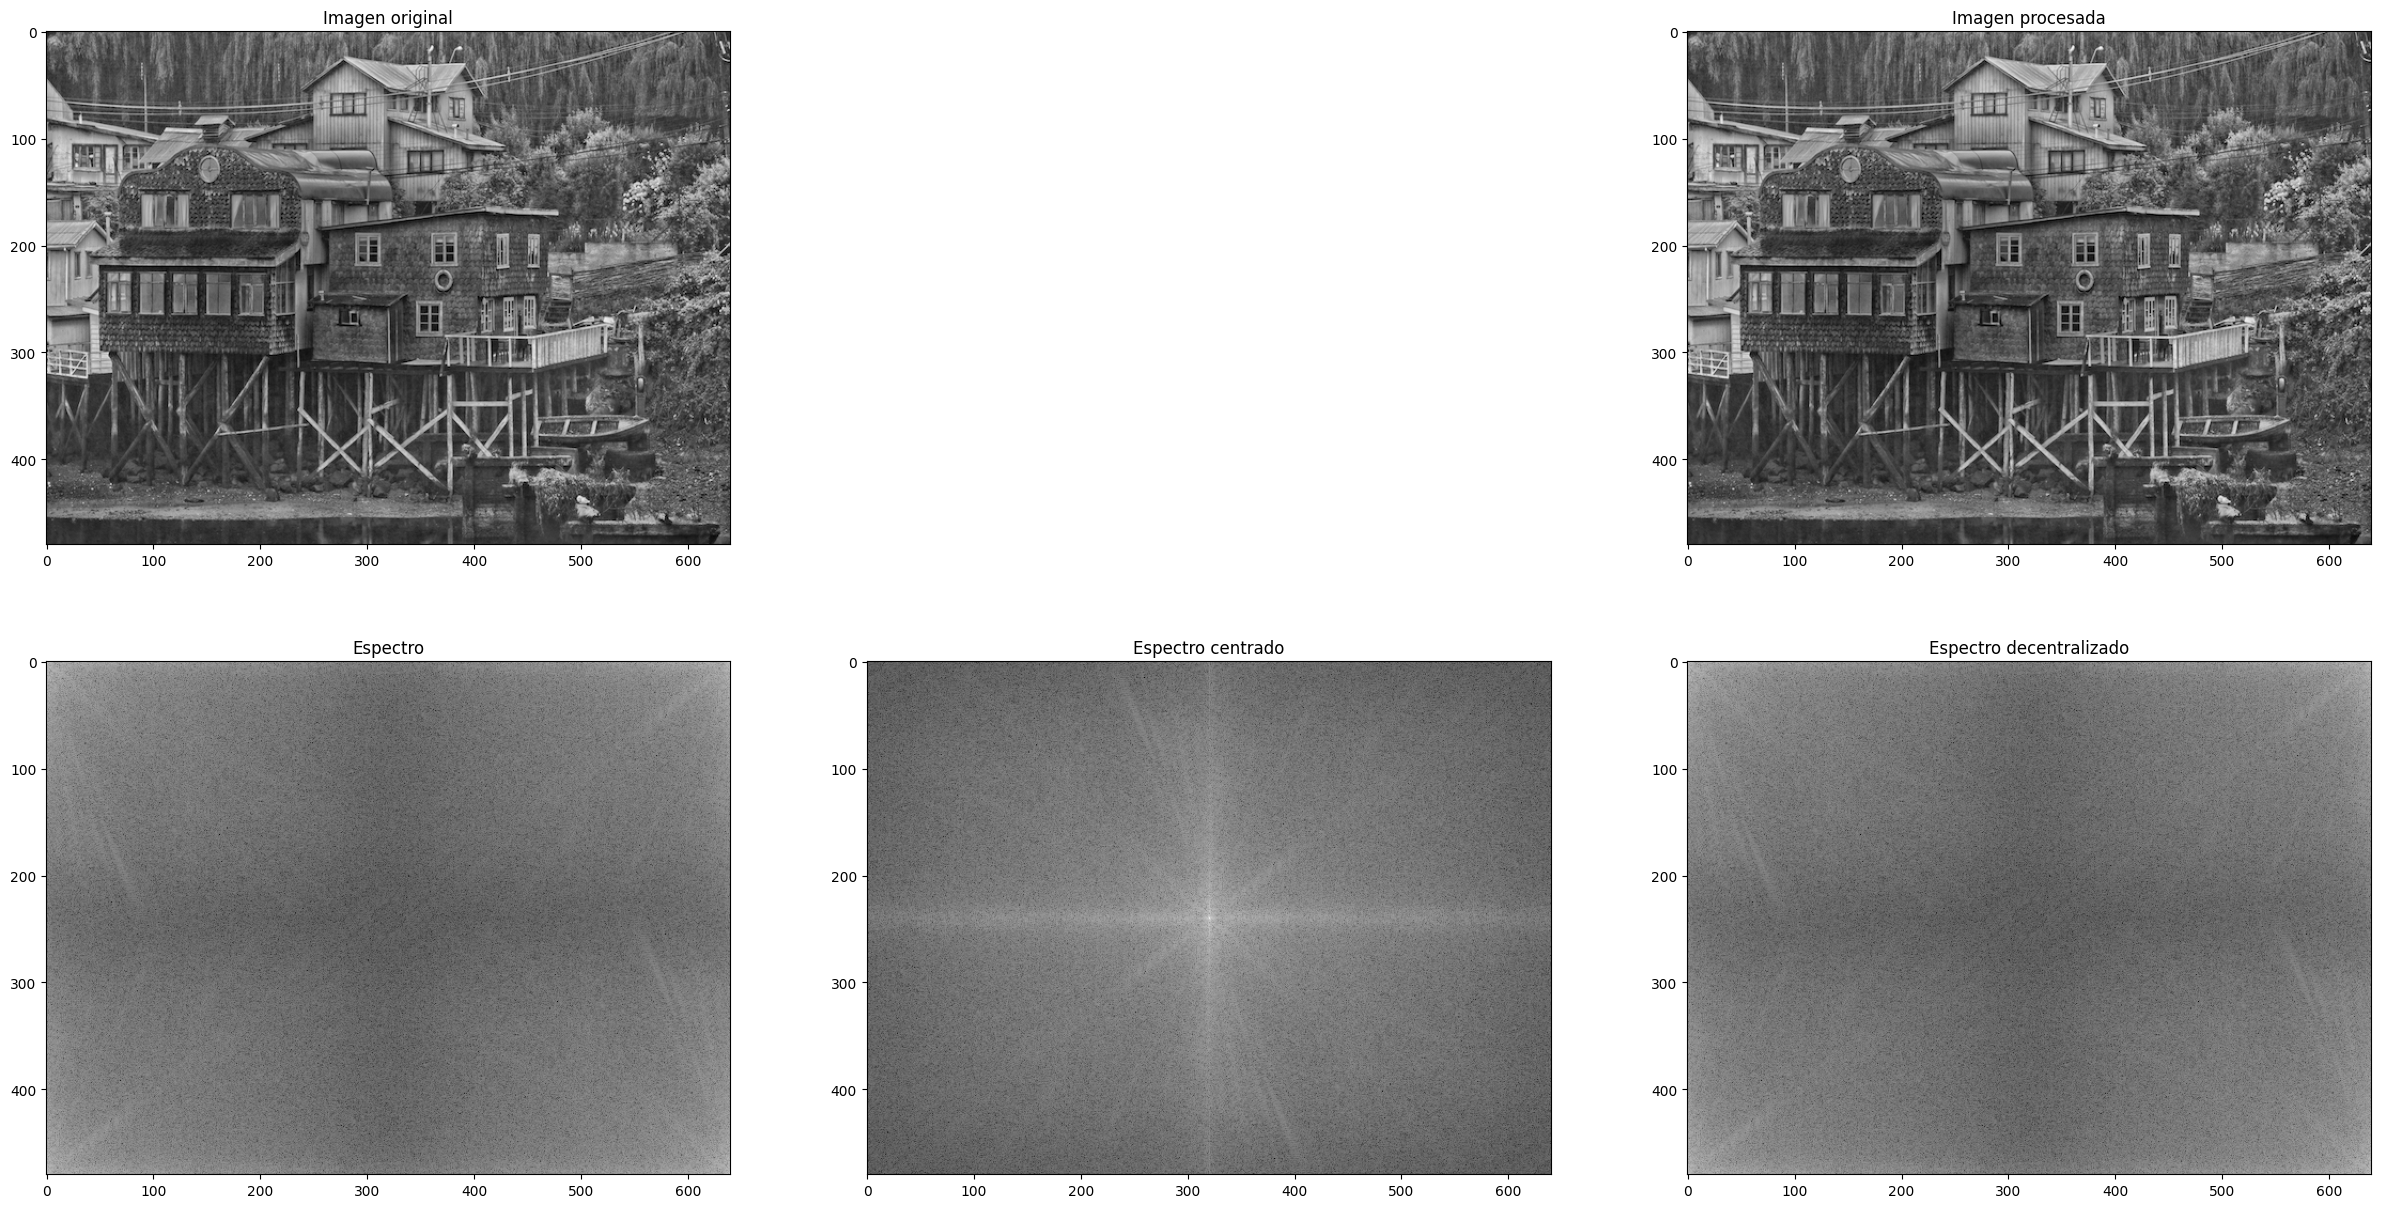

In [ ]:
# La imagen original es transformada de ida y de vuelta (sin procesar)

plt.figure(figsize=(30,15))

plt.subplot(231), plt.imshow(X, "gray"), plt.title("Imagen original")

X_ft = fft2(X)
plt.subplot(234), plt.imshow(np.log(1+np.abs(X_ft)), "gray"), plt.title("Espectro")

X_ftc = fftshift(X_ft)
plt.subplot(235), plt.imshow(np.log(1+np.abs(X_ftc)), "gray"), plt.title("Espectro centrado")

X_ft_inv = ifftshift(X_ftc)
plt.subplot(236), plt.imshow(np.log(1+np.abs(X_ft_inv)), "gray"), plt.title("Espectro decentralizado")

X_new = ifft2(X_ft_inv)
plt.subplot(233), plt.imshow(np.abs(X_new), "gray"), plt.title("Imagen procesada")

plt.show()

# <font color='darkred'> **Representación a colores del espectro**

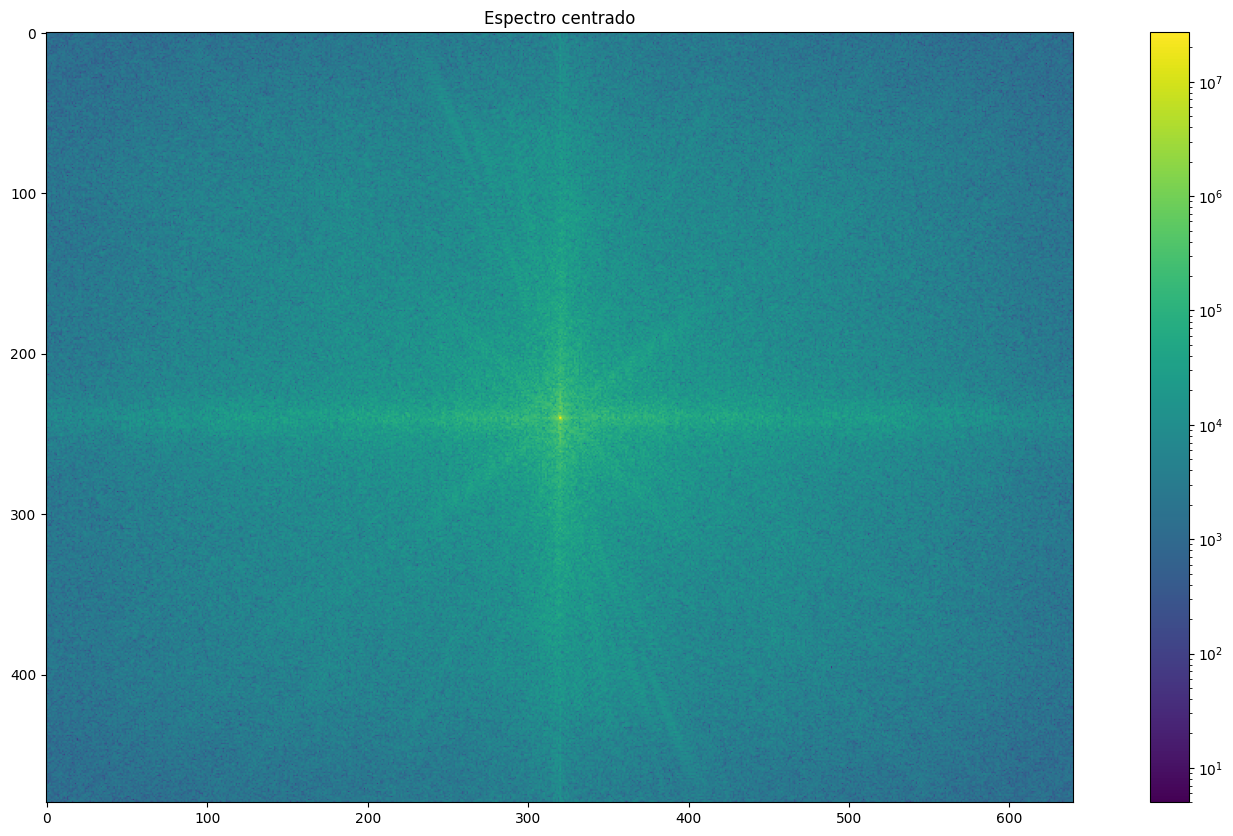

In [ ]:
plt.figure(figsize=(20,10))
plot_spectrum(X_ft)
plt.title('Espectro centrado')
plt.show()

# <font color='darkred'> **Ejemplos de Filtros**

# <font color='darkred'> Filtro ideal, Butterworth, Gaussian

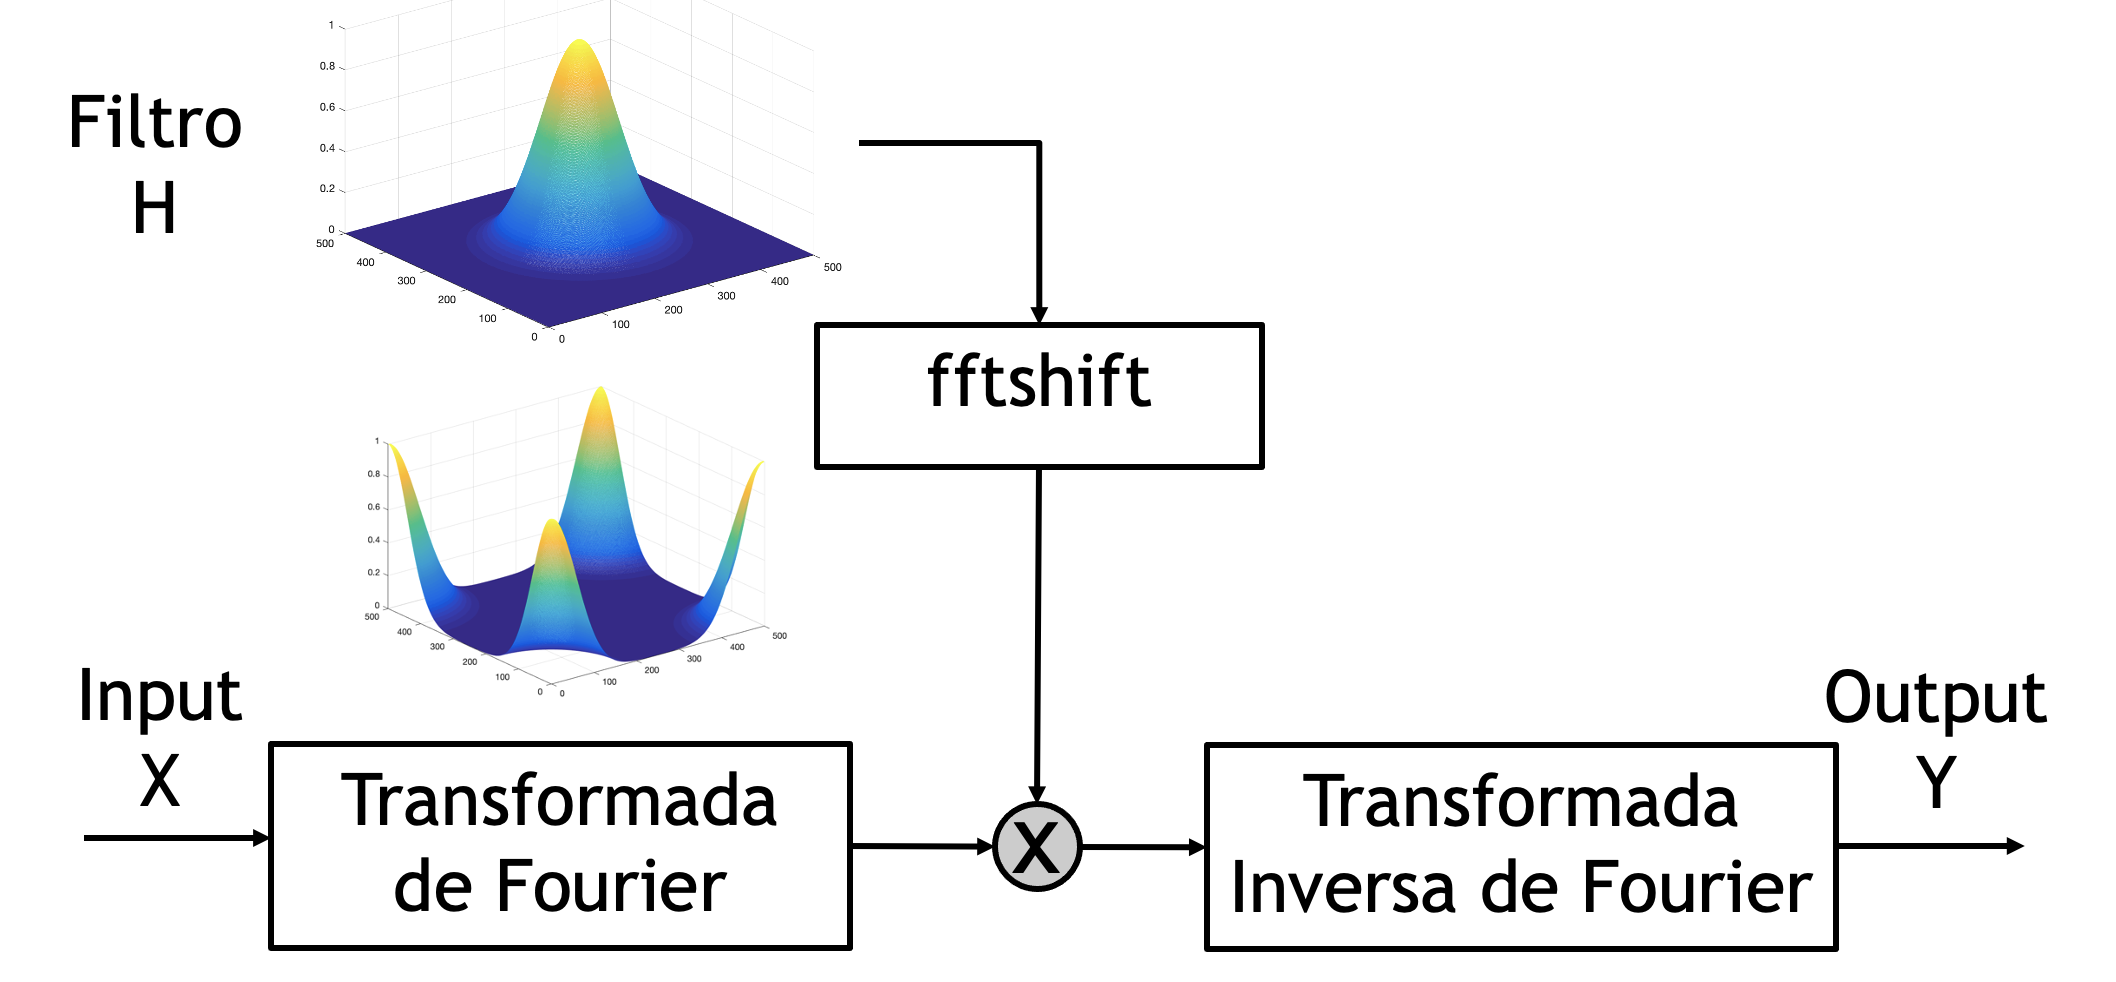

# <font color='darkred'> **Definir un filtro Gaussiano Pasaaltas**

Estas funciones están diseñadas para crear un filtro de paso bajo Gaussiano que se puede aplicar a una imagen en el dominio de la frecuencia para suavizarla (es decir, reducir las altas frecuencias).

La función distance es una función auxiliar utilizada para calcular la distancia entre dos puntos, y la función gaussianLP utiliza esta función para construir el filtro.

In [ ]:
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# <font color='darkred'> **Aplicar diferentes tipos de filtros**

Permite al usuario seleccionar entre diferentes tipos de filtros y aplicar un filtro de paso bajo o paso alto a una imagen en el dominio de la frecuencia. Luego, visualiza la imagen original, el filtro, los espectros de frecuencia antes y después de la filtración, y la imagen resultante después de aplicar el filtro. Es una herramienta útil para entender y visualizar cómo diferentes filtros afectan una imagen en el dominio de la frecuencia.

Gaussian
high pass


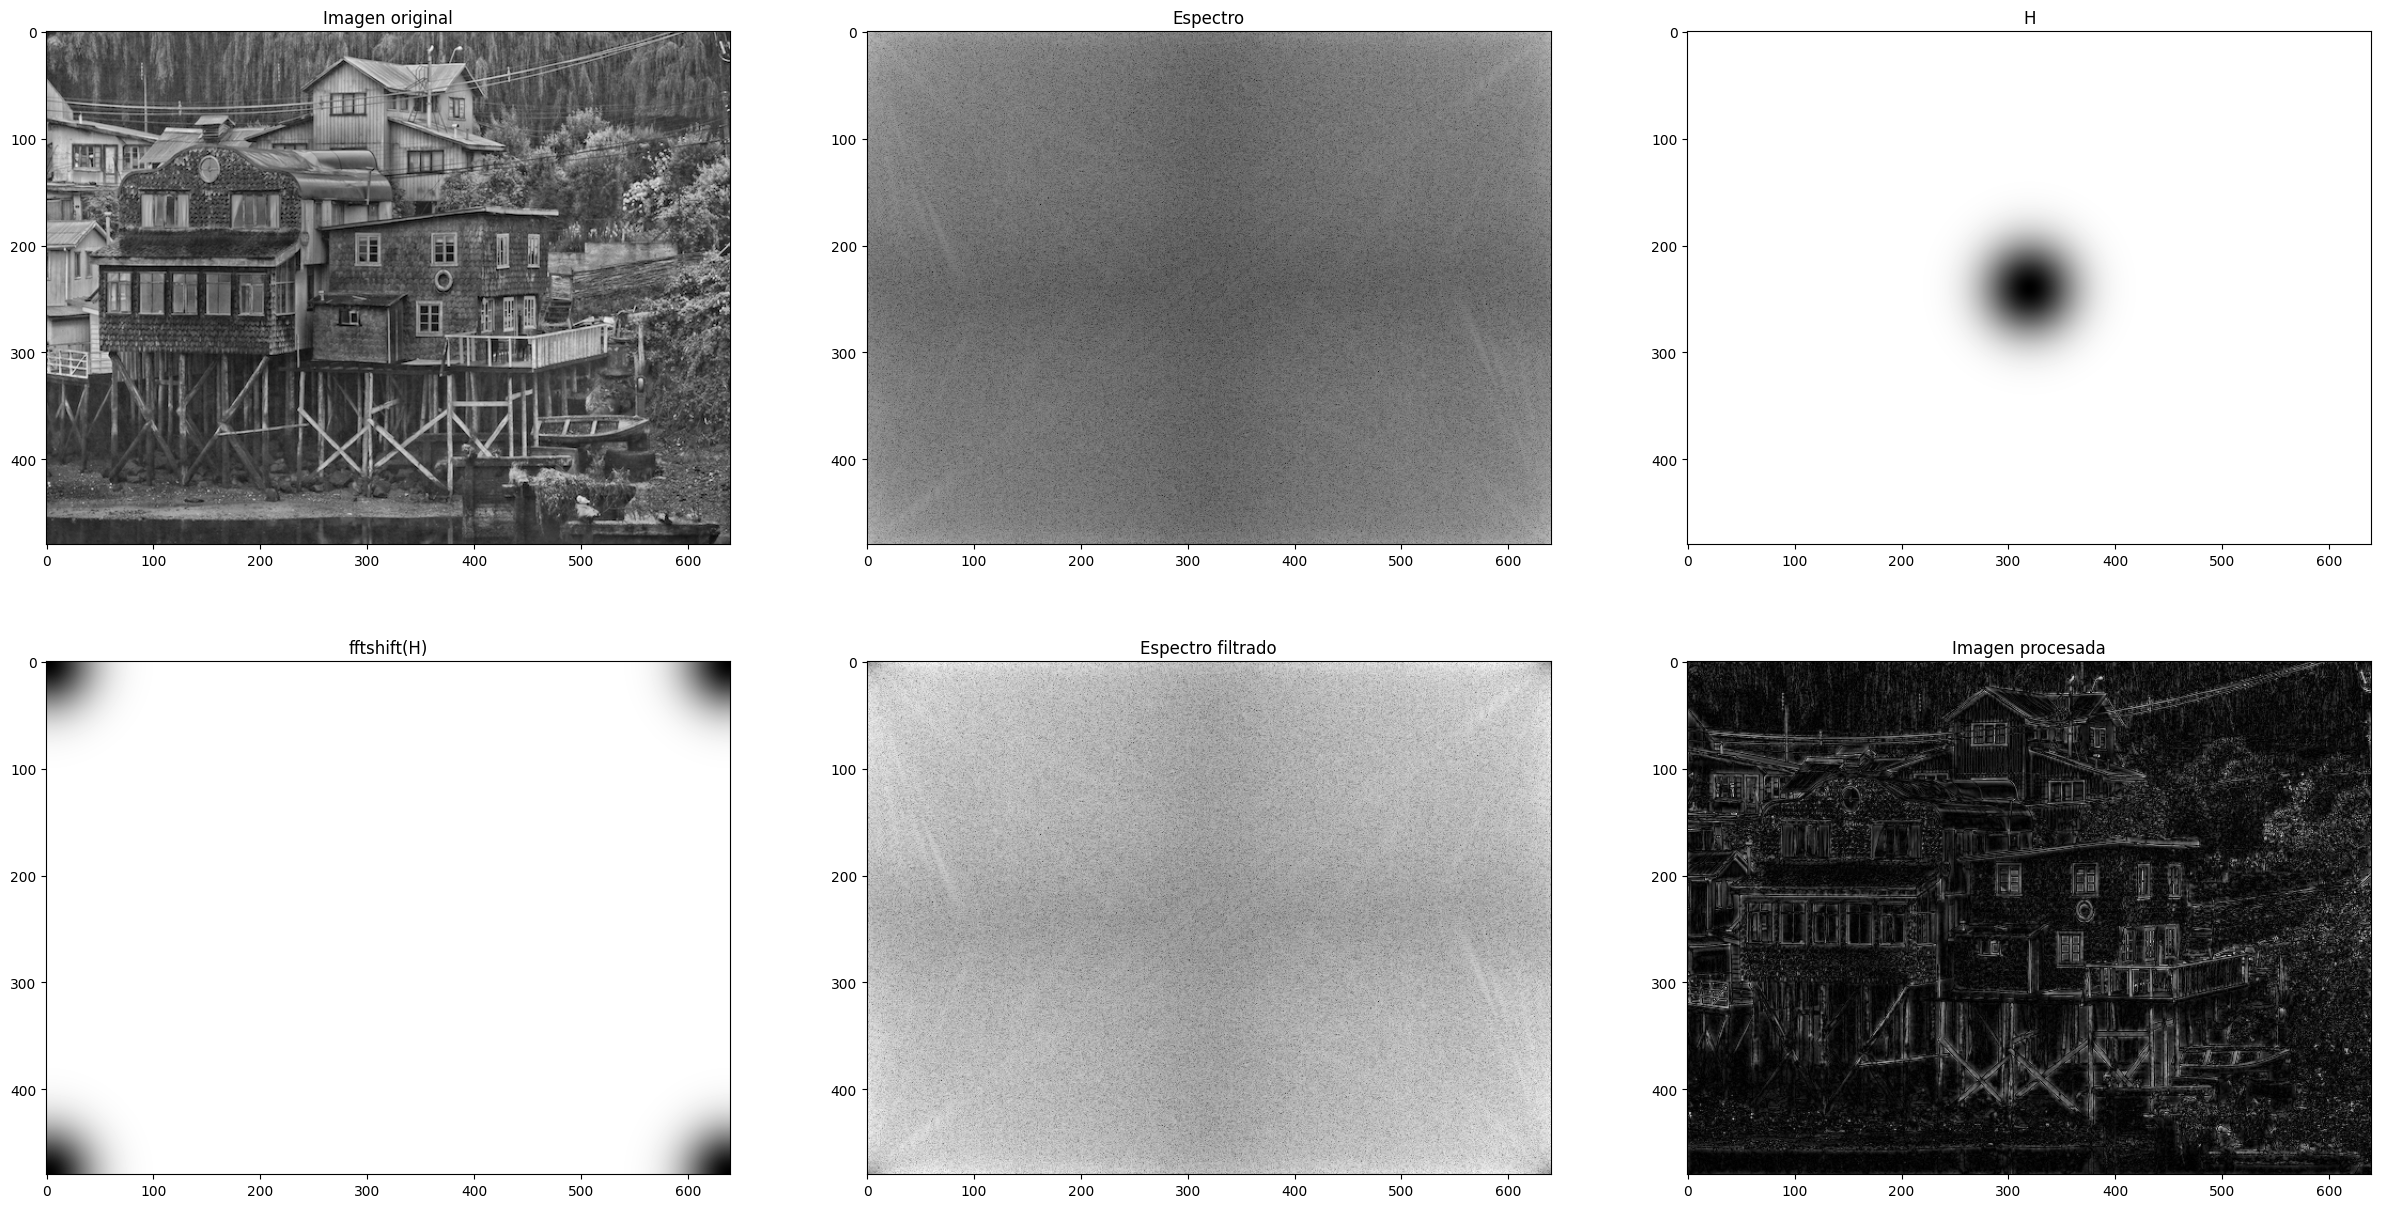

In [ ]:
lp     = 2  # 1: low pass 2: high pass
filtro = 3  # 1: ideal, 2: butterworth, 3: gaussian
Do     = 30 # frecuencia de corte
n      = 2 # orden Butterworth

if filtro == 1:
  H = idealFilterLP(Do,X.shape)
  print('Ideal')
elif filtro == 2:
  n = 4
  H = butterworthLP(Do,X.shape,n)
  print('Butterworth')
elif filtro == 3:
  H = gaussianLP(Do,X.shape)
  print('Gaussian')

if lp==2:
  H = 1-H
  print('high pass')

plt.figure(figsize=(30,15))

plt.subplot(231), plt.imshow(X, "gray"), plt.title("Imagen original")

X_ft = fft2(X)
plt.subplot(232), plt.imshow(np.log(1+np.abs(X_ft)), "gray"), plt.title("Espectro")


plt.subplot(233), plt.imshow(H, "gray"), plt.title("H")

H_c = fftshift(H)
plt.subplot(234), plt.imshow(H_c, "gray"), plt.title("fftshift(H)")

Y_ft = X_ft * H_c
plt.subplot(235), plt.imshow(np.log(1+np.abs(Y_ft)), "gray"), plt.title("Espectro filtrado")

X_new = ifft2(Y_ft)
plt.subplot(236), plt.imshow(np.abs(X_new), "gray"), plt.title("Imagen procesada")

plt.show()

# <font color='darkred'> **Filtro anti-aliasing**#

Es importante recordar que el filtro anti-aliasing es un filtro pasa-bajos que se utiliza ANTES de muestrear la imagen para eliminar las altas frecuencias de la imagen original. De esta manera, la imagen muestreada respeta el teorema de Nyquist, esto es muestrar la imagen al menos al doble de la máxima frecuencia de la (nueva) imagen.

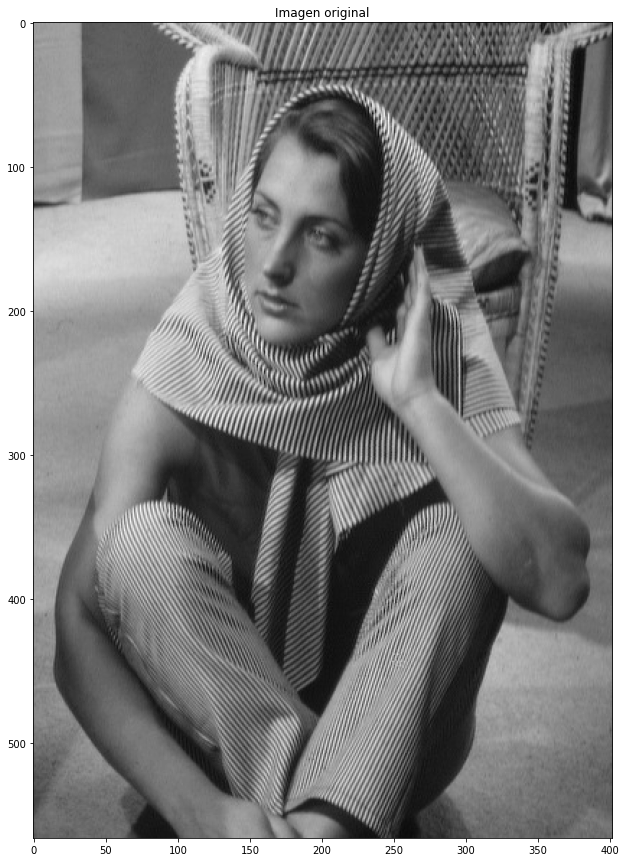

In [ ]:
X = cv2.imread('translape.tiff',0)
plt.figure(figsize=(30,15))
plt.imshow(X,cmap='gray')
plt.title("Imagen original")
plt.show()

# <font color='darkred'> **Submuestreo cada s pixeles en ambas direcciones (horizontal y vertical)**

La función subsampling toma una matriz X y un factor de submuestreo s como entrada y devuelve una versión submuestreada de X que tiene 1 de cada s valores en ambas direcciones. Es una forma de reducir la resolución o el tamaño de una imagen o matriz.

In [ ]:
def subsampling(X,s):
  (N,M) = X.shape
  N2 = int(N/s)
  M2 = int(M/s)

  Y = np.zeros((N2,M2))
  for i2 in range(N2):
    i = int(i2*s)
    for j2 in range(M2):
      j = int(j2*s)
      Y[i2,j2] = X[i,j]
  return Y

# <font color='darkred'> **Submuestreo sin filtro anti-aliasing**

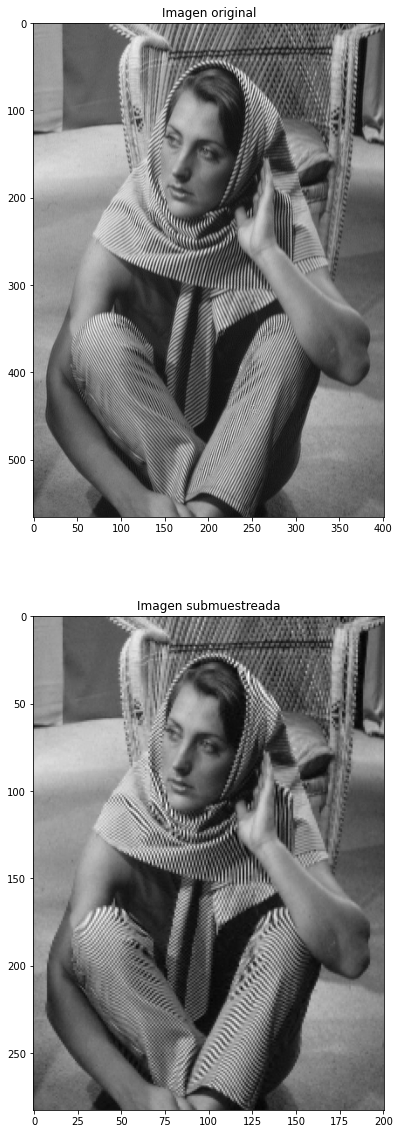

In [ ]:
m = 2 # submuestreo cada m pixeles
Y = subsampling(X,m)

plt.figure(figsize=(40,20))


plt.subplot(211),plt.imshow(np.abs(X), "gray"), plt.title("Imagen original")
plt.subplot(212),plt.imshow(np.abs(Y), "gray"), plt.title("Imagen submuestreada")

plt.show()

# <font color='darkred'> **Submuestreo CON filtro anti-aliasing**
Filtra una imagen en el dominio de la frecuencia utilizando un filtro de paso bajo Gaussiano, convierte la imagen filtrada de nuevo al dominio espacial y luego submuestrea la imagen filtrada antes de visualizar ambos resultados.

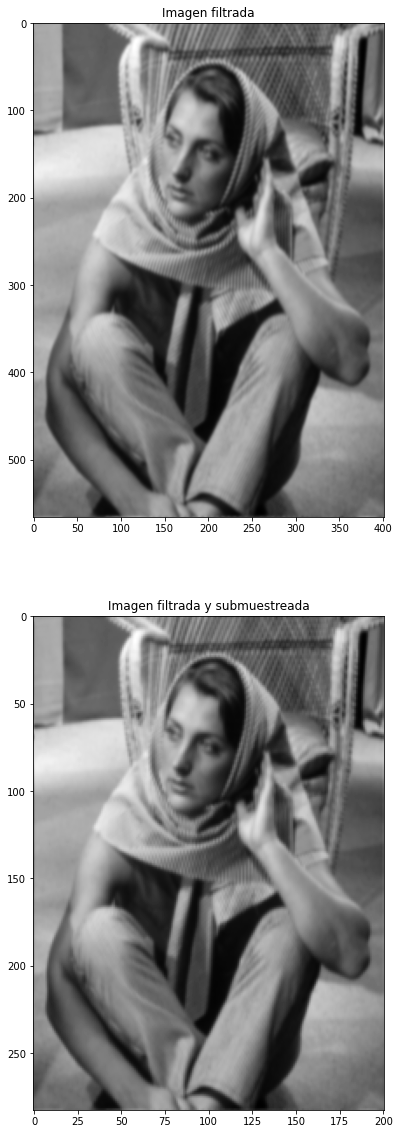

In [ ]:
X_ft = fft2(X)
X_ftc = fftshift(X_ft)

Do = 50

plt.figure(figsize=(40,20))


Yo_ftc = X_ftc * gaussianLP(Do,X.shape)
Yo_ft = ifftshift(Yo_ftc)
Yo = ifft2(Yo_ft).real

Y  = subsampling(Yo,m)

plt.subplot(211),plt.imshow(np.abs(Yo), "gray"), plt.title("Imagen filtrada")
plt.subplot(212),plt.imshow(np.abs(Y), "gray"), plt.title("Imagen filtrada y submuestreada")

plt.show()